# 数理手法Ⅶ 時系列解析 第2回 レポート
#### 計数工学科 数理情報工学コース 3年
#### 学生証番号: XX-XXXXXX 氏名: 佐藤 瞭
#### 連絡先: XXX

---

In [1]:
library('TSSS')
library('TTR')
library('tseries')
library('forecast')

---

第1回ではビットコインの価格予測を試みたが、分析をしても有効な知見を得られそうにないことや、株価同様に予測自体が困難、という情報を見かけたことから、扱うデータを変更する。

---

# 新データに対する第1回の問題への解答

目的:  
- **ある製品の未来の生産量や、その製品の業界が獲得する利益を予測すること。**

予測ができれば、関連企業の株の取引により利益を得ることができないかと考えた。また、製造業で就職や起業を考える際に、未来の市場の規模や利益の上げやすさを予測することで、将来有望な製品の種類を推測できるようになると考えた。

- **生産量や利益の変化点を検出すること。**

生産量や利益に影響を与えると思われる出来事との関係がないか調べてみようと思ったため。（たとえば、鳥インフルエンザの流行は鶏肉の生産量を減らすのではないか、という仮説をたてることができる。）ある時点が変化点となった原因の事例を集めることで、将来似たようなことがあったときに生産量や利益のトレンドの大まかな変化を予測できるのではないかと考えた。

生産量や利益を直接示すようなまとまったデータは得られなかったので、これらに影響を強く受けるであろう指標として、鉱工業生産指数（付加価値ベース）を用いる。データは
https://www.meti.go.jp/statistics/tyo/iip/b2010_result-2.html
から取得し、1993年01月から2008年08月の、月次のデータを得た。今回は乳製品のデータを解析する。

# 2

## (a)

まずはそのままプロットしてみる。

In [1]:
data <- read.csv('iip.csv')
milk <- data[['milk']]

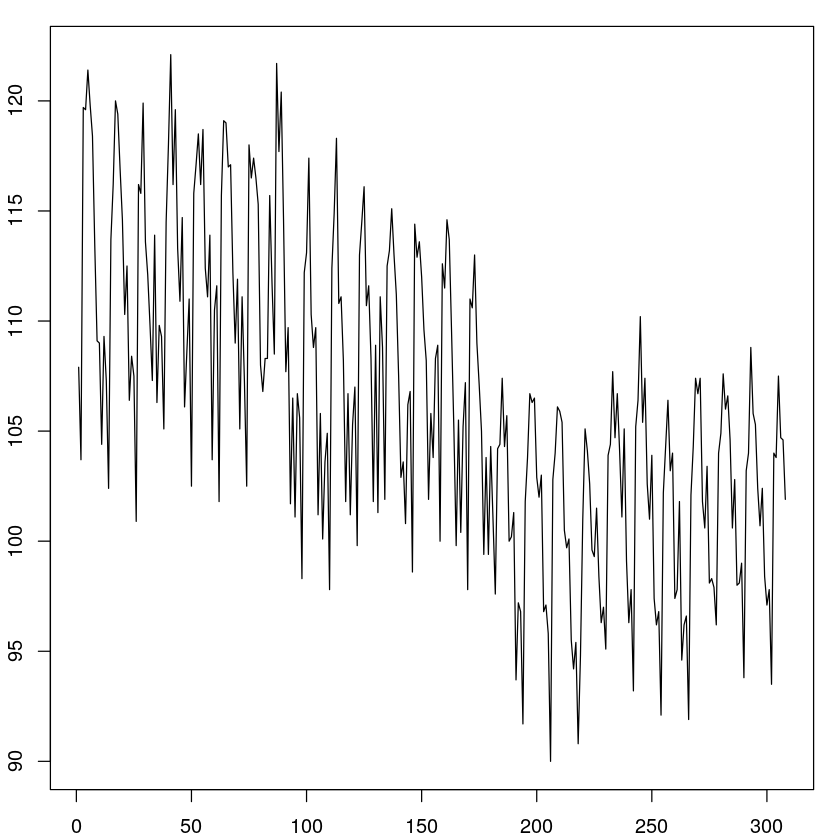

In [2]:
par(mar=c(2,2,1,1)+0.1)
plot(milk, type='l')

## (b) (c)

区分的には平均定常と思われる。

周期性を考慮して前年比の差分をとれば定常化できそうなので、12ヶ月前との差分をとってみる。

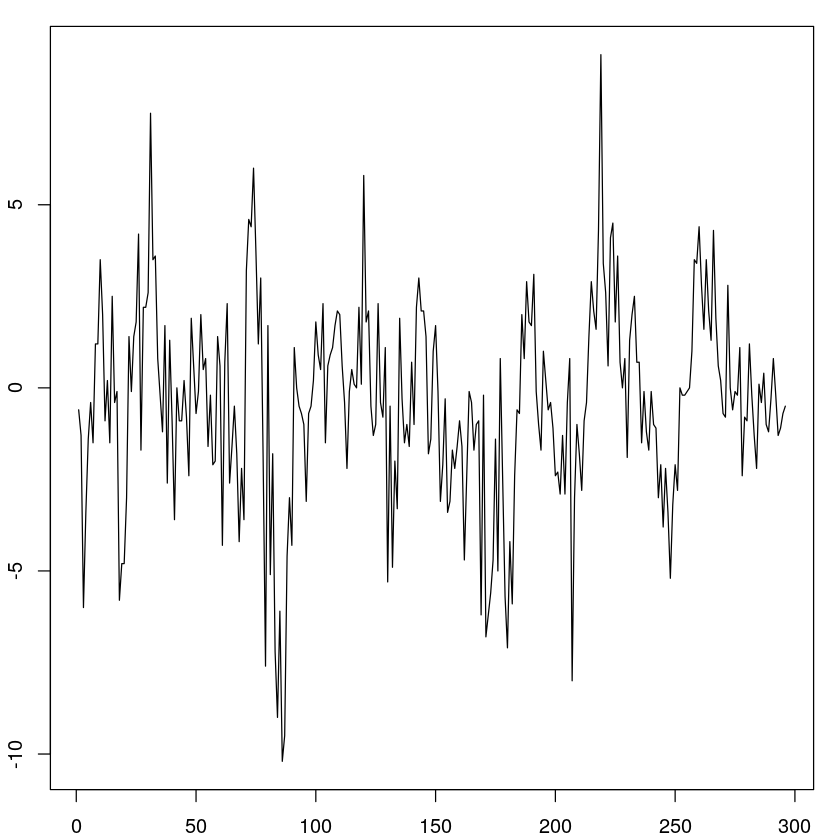

In [4]:
par(mar=c(2,2,1,1)+0.1)
plot(diff(milk, lag = 12, difference = 1), type = 'l')

これにより、かなり定常化できたように思われる。

---

# 3

## (a)

自己共分散関数を次の図に示す。

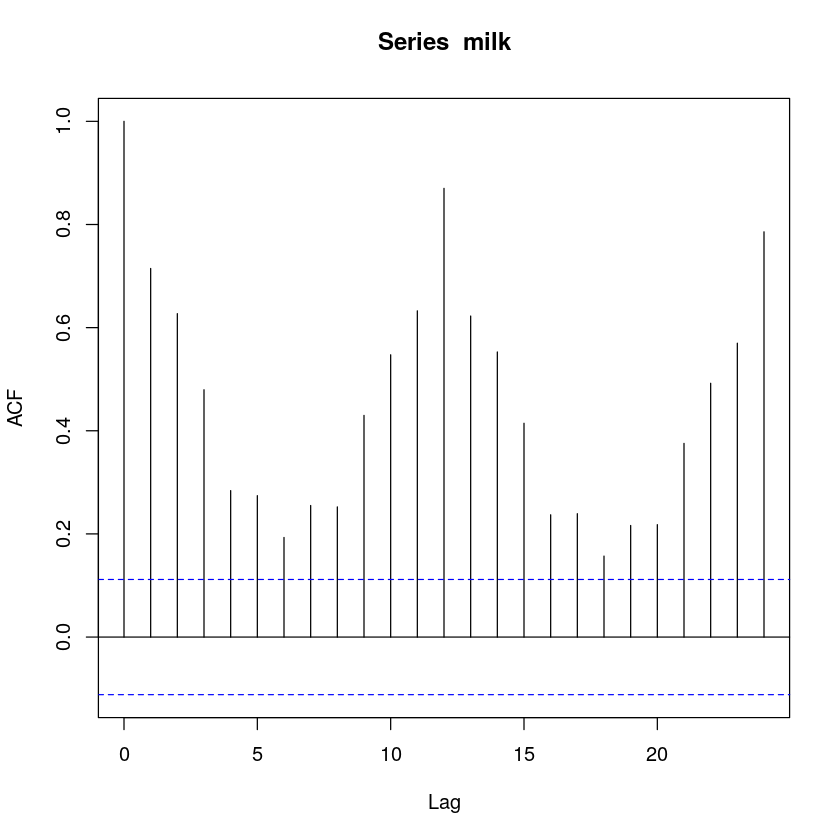

In [5]:
# 元のデータ
acf(milk)

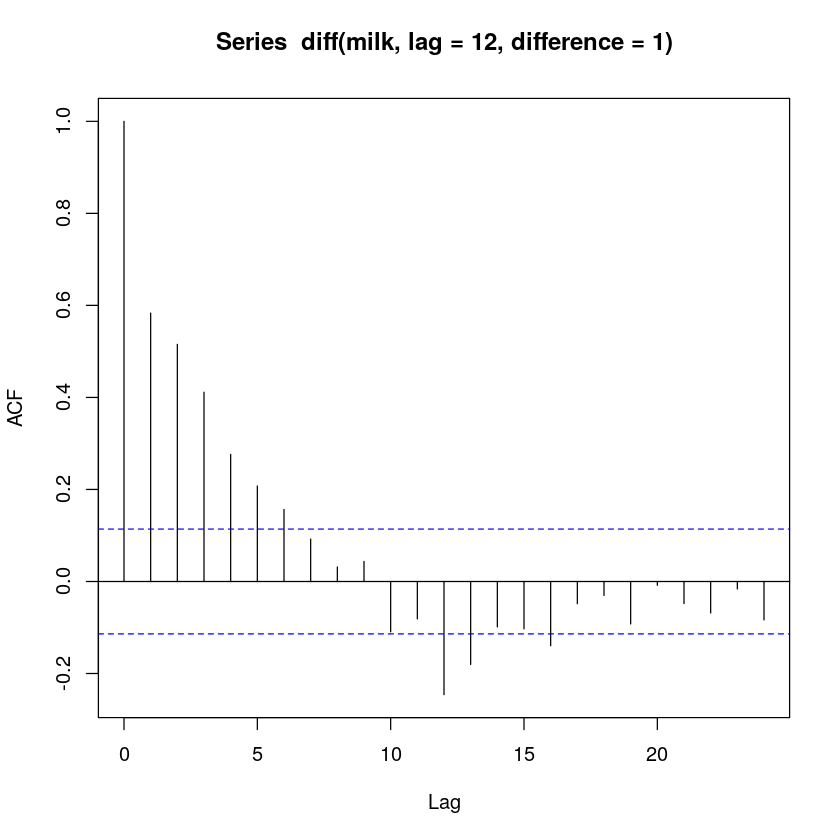

In [6]:
# 前年比差分
acf(diff(milk, lag = 12, difference = 1))

12ヶ月周期でピークがくる。ある月の値はその月に近い月の値と相関が強いといえる。

## (b)

スペクトルを次の図に示す。

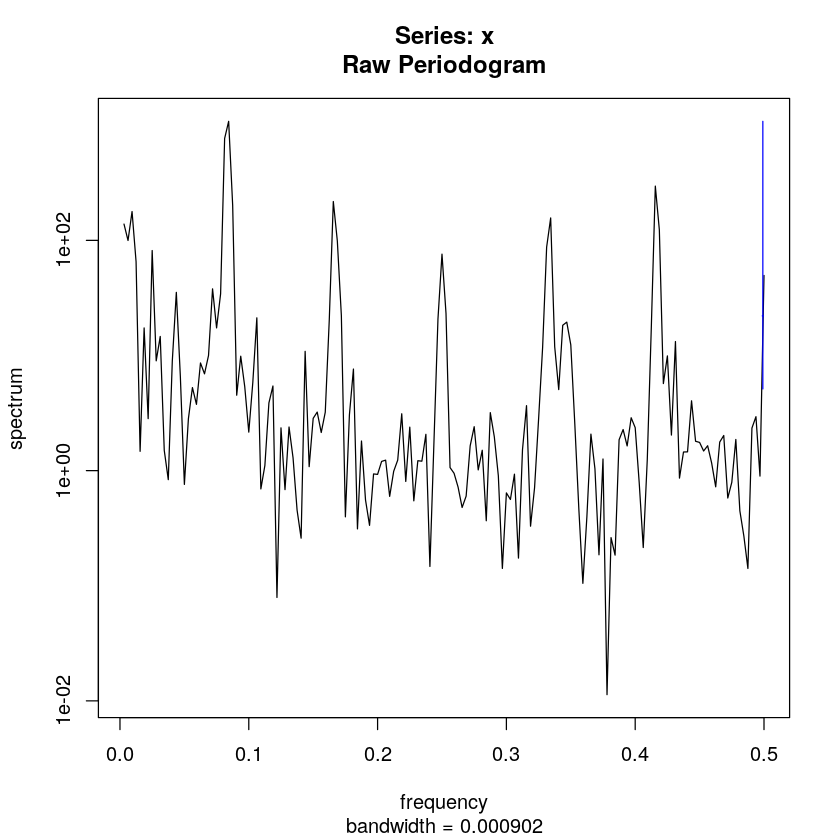

In [7]:
spectrum(milk)

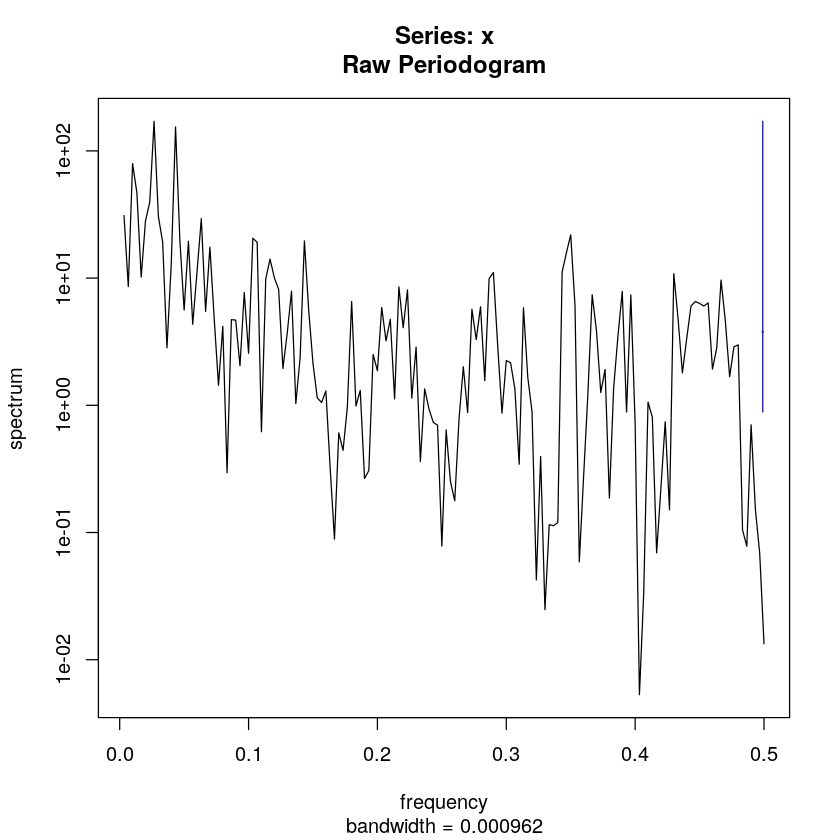

In [8]:
spectrum(diff(milk, lag = 12, difference = 1))

差分をとる前のスペクトルからは周期性が見られたが、差分をとるとその傾向がなくなり、周期性が薄れたように見られる。
そのため、差分や季節調整を利用したモデルが予測には有用ではないか、という仮説を立てることができる。

## (c)

(a) (b)のそれぞれにコメントしてあるとおり。

データには、下の図にみられるように周期性が見られた。


 tau2		 8.85019e-01	 1.10058e-08
 sigma2		 1.68187e+00
 log-likelihood	    -728.043
 aic		    1484.087



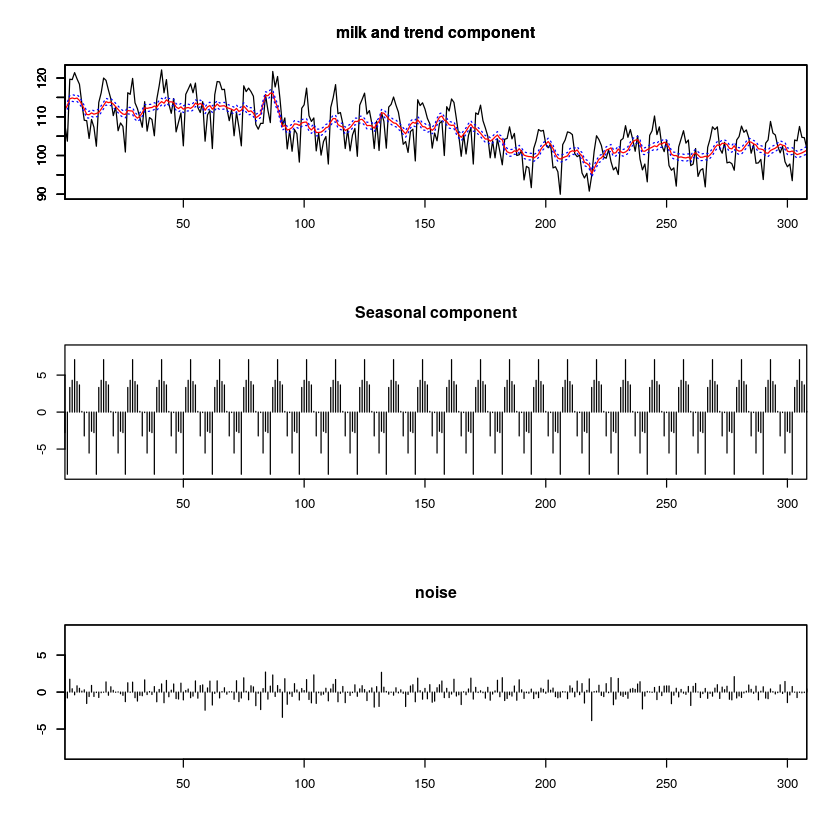

In [9]:
season(milk)

---

## 第2回の問題に対する解答

まず、単位根検定を行い、データが単位根過程でないことを確認しておく。

In [10]:
pp.test(milk)

Warning message in pp.test(milk):
“p-value smaller than printed p-value”


	Phillips-Perron Unit Root Test

data:  milk
Dickey-Fuller Z(alpha) = -154.22, Truncation lag parameter = 5, p-value
= 0.01
alternative hypothesis: stationary


p-値が非常に小さく、データは単位根過程でないと考えられる。

# 1

## (a)

目的別に、

1. 未来の値の予測のためにARモデルを利用

2. 変化点の探索のために局所定常ARモデルを利用

した。

## (b)

### 1. 予測のためにARモデルを利用

forcastパッケージのauto.arimaで、ARモデルでAICが最も小さくなるように次数を探索していく。10年先、20年先までの予測を出してみる。ARIMAモデルの次数を$(p, 0, 0)$とすることでARモデルに限定し、$p$を変化させて探索する。


 Fitting models using approximations to speed things up...

 ARIMA(0,0,0) with zero mean     : 3751.96
 ARIMA(0,0,0) with non-zero mean : 2062.746
 ARIMA(1,0,0) with zero mean     : Inf
 ARIMA(1,0,0) with non-zero mean : 1844.998
 ARIMA(2,0,0) with zero mean     : Inf
 ARIMA(2,0,0) with non-zero mean : 1829.525
 ARIMA(3,0,0) with zero mean     : Inf
 ARIMA(3,0,0) with non-zero mean : 1821.097
 ARIMA(4,0,0) with zero mean     : Inf
 ARIMA(4,0,0) with non-zero mean : 1803.398
 ARIMA(5,0,0) with zero mean     : Inf
 ARIMA(5,0,0) with non-zero mean : 1792.892
 ARIMA(6,0,0) with zero mean     : Inf
 ARIMA(6,0,0) with non-zero mean : 1795.443
 ARIMA(7,0,0) with zero mean     : Inf
 ARIMA(7,0,0) with non-zero mean : 1781.797
 ARIMA(8,0,0) with zero mean     : Inf
 ARIMA(8,0,0) with non-zero mean : 1784.001
 ARIMA(9,0,0) with zero mean     : Inf
 ARIMA(9,0,0) with non-zero mean : 1702.589
 ARIMA(10,0,0) with zero mean     : Inf
 ARIMA(10,0,0) with non-zero mean : 1688.947
 ARIMA(11,0,0) with 

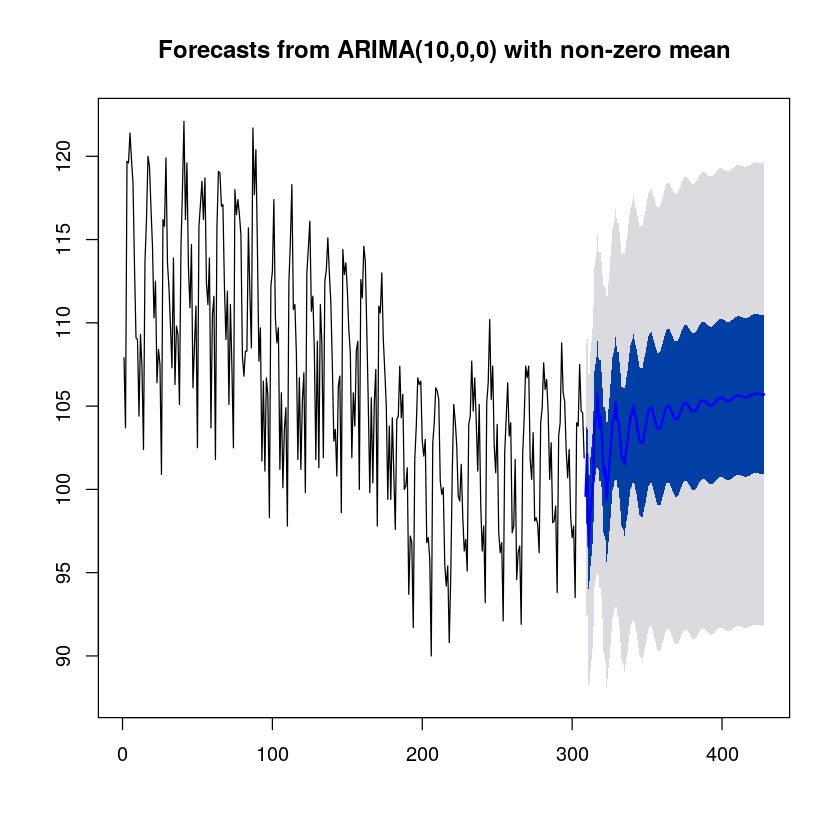

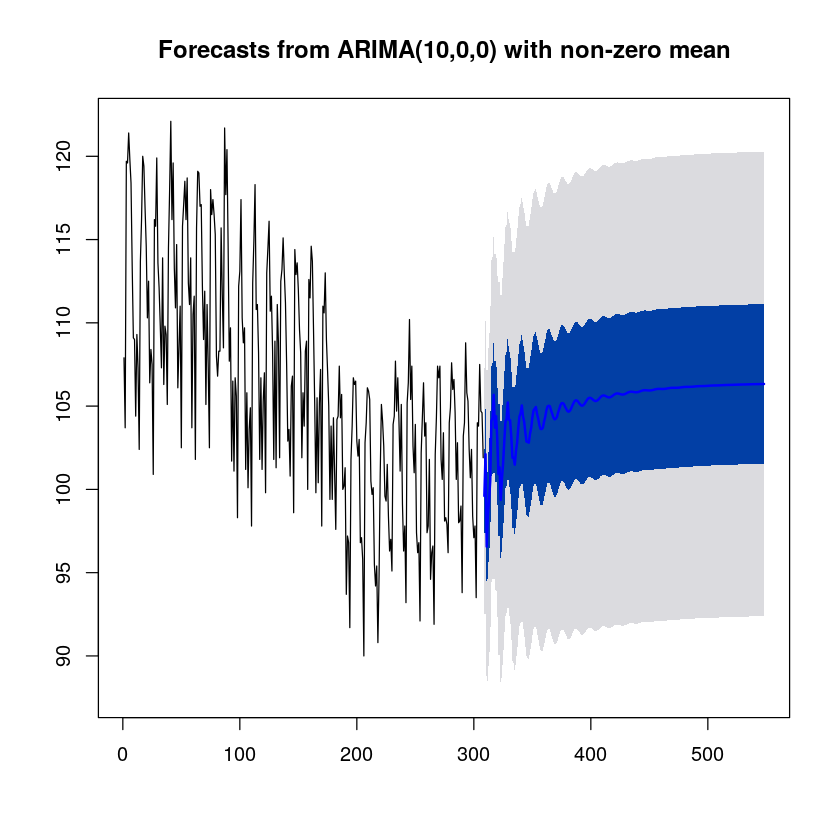

In [11]:
model_ar <- auto.arima(
    milk, ic = "aic", max.p = 12, max.d=0, max.q = 0, max.order = 12,
    trace = T, stepwise = F, seasonal = F)
plot(forecast(model_ar, level = c(50,95),h = 120))
plot(forecast(model_ar, level = c(50,95),h = 240))

予測値に周期的な振動は見られるが、時間が経つにつれて振動が減衰して、予測値や信頼区間が一定の値に収束してしまっている。ARモデルは周期的な変動を長期にわたって予測するのには向かないことが伺える。

### 2. 変化点の探索のために局所定常ARモデルを利用する

<<< new data ( n = 13 --- 36 ) >>>
 initial model : NS =    24
		ms = 12   sds =  3.221851e+00   aics =      122.188

<<< new data ( n = 37 --- 60 ) >>>
 switched model : ( nf = 24, ns = 24 )
	 ms = 12   sds =  3.547822e+00   aics =      246.689
 pooled model : ( np = 48 )
	 mp = 12   sdp =  4.971155e+00   aicp =      239.193

 ***  pooled model accepted   ***

<<< new data ( n = 61 --- 84 ) >>>
 switched model : ( nf = 48, ns = 24 )
	 ms = 12   sds =  2.230384e+00   aics =      352.555
 pooled model : ( np = 72 )
	 mp = 12   sdp =  5.269901e+00   aicp =      349.992

 ***  pooled model accepted   ***

<<< new data ( n = 85 --- 108 ) >>>
 switched model : ( nf = 72, ns = 24 )
	 ms = 12   sds =  8.596587e+00   aics =      495.734
 pooled model : ( np = 96 )
	 mp = 12   sdp =  7.874107e+00   aicp =      496.540

 ***  switched model accepted   ***

<<< new data ( n = 109 --- 132 ) >>>
 switched model : ( nf = 24, ns = 24 )
	 ms = 12   sds =  1.190416e+00   aics =      244.034
 pooled mod

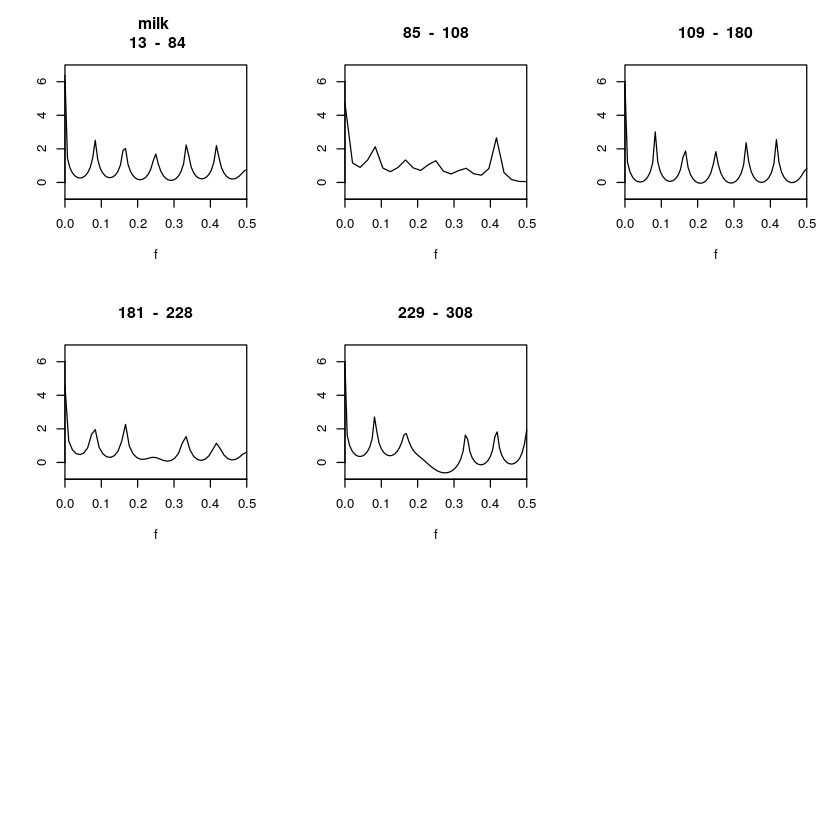

In [12]:
lsar(milk, max.arorder = 12, ns0 = 24)

データの周期的な振動の平均値が 一定の区間→変化している区間→一定の区間…という分割を与えられているように見える。  
変化がみられた区間で、具体的な変化点を求めてみる

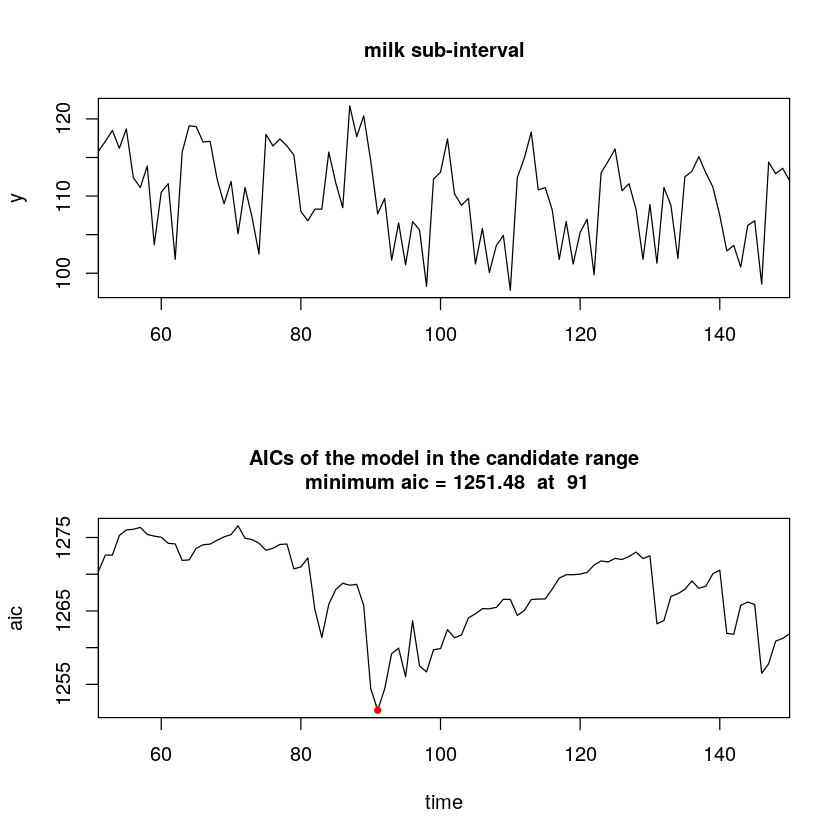

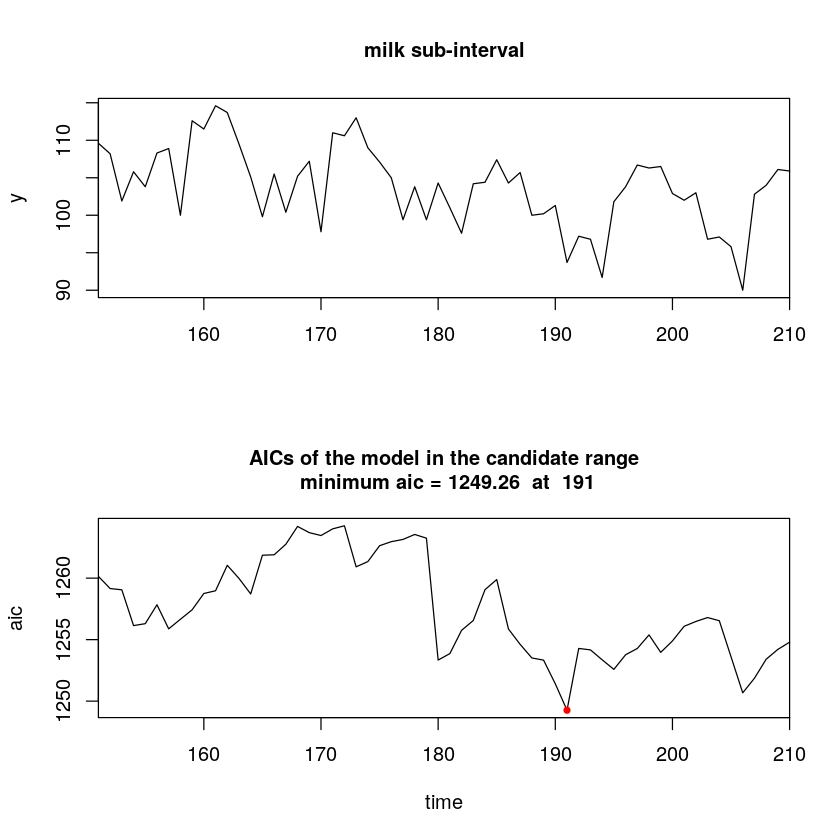

In [13]:
lsar.chgpt(milk, subinterval = c(0, 308), candidate = c(50, 150))
lsar.chgpt(milk, subinterval = c(0, 308), candidate = c(150, 210))

2000年07月と2008年11月が変化点という結果になった。どちらの時点でも、その後に周期的な振動の平均値が減少しているため、このあたりの時期に、乳製品の付加価値を減少させる出来事があったことが推測される。

まず、2000年6月には雪印乳業食中毒事件が発生していた[1]。この事件により乳製品の売上が減少し、利益減少による付加価値の減少につながった可能性が考えられる。

次に、2008年の乳製品に関する情報を探してみたところ、10月に、2009年3月から生乳価格を引き上げる決定がなされていたことがわかった[2]。原価の上昇は付加価値の減少につながりうるが、複数の乳製品を製造している企業が価格改定の決定を2008年に出している[3][4][5]ことから、利益は変わらずに付加価値も変化していない可能性がある。したがって、生乳の価格改定が付加価値減少のきっかけになったかどうかは判断しがたい。

2008年11月が変化点になった他の要因として、同年09月に発生したリーマンショックが挙げられる。こちらの影響のほうが大きいのかもしれない。

## (c)

### 1. ARモデルによる予測の問題点

- 周期的な変動を捉えきれておらず、予測値の振動が減衰してしまっている。
- 予測値の信頼区間がある程度までは広がっており、確信の高い予測ができていない。

### 2. 局所定常ARモデルによる変化点検出の問題点

- 変化点検出には局所定常ARモデルで十分なように思われる。
- 解析の目的は、高速な予測を求めるものではないので、現状は計算量は気にしなくてよいと考え、アルゴリズムの効率に問題点を探すことはしなくてよいと判断した。もしも高速な計算が求められる場合はChange Finderのほうが有用になる可能性がある。

## (d)

### 1. ARモデルによる予測の改善

予測の残差を調べてみる。


	Ljung-Box test

data:  Residuals from ARIMA(10,0,0) with non-zero mean
Q* = 318.09, df = 3, p-value < 2.2e-16

Model df: 11.   Total lags used: 14



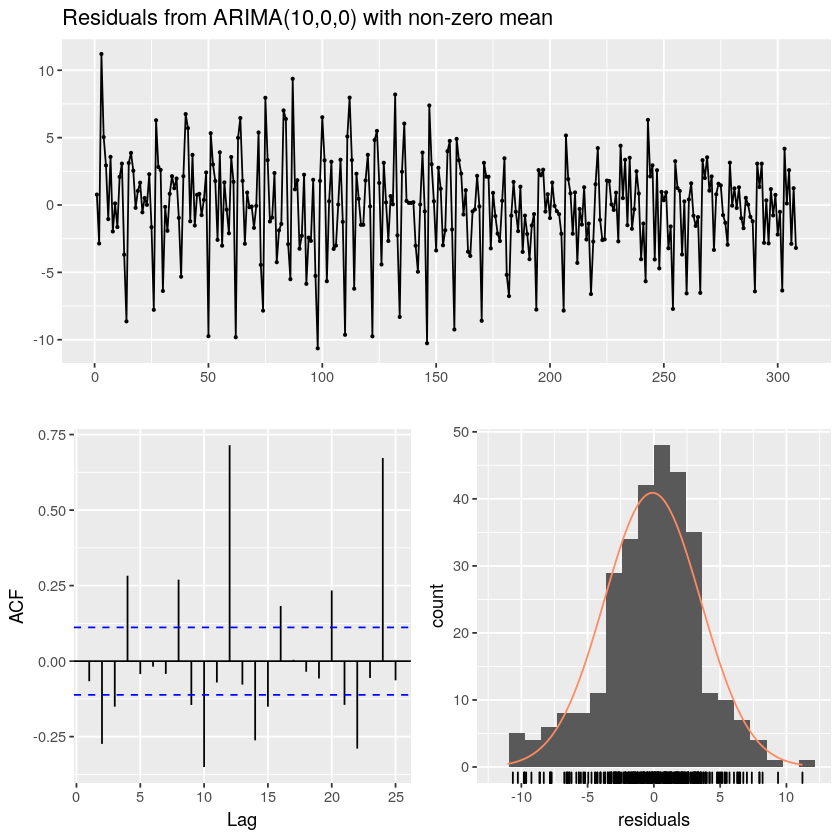

In [14]:
checkresiduals(model_ar)

残差の自己相関に12ヶ月周期のピークが現れている。そこで、データの周期性を考慮し、季節調整を加えたARIMAモデルであるSARIMAモデルによる予測を試してみる。


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,1,1)[12] with drift         : 1227.125
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 1415.561
 ARIMA(1,0,0)(1,1,0)[12] with drift         : 1277.011
 ARIMA(0,0,1)(0,1,1)[12] with drift         : 1309.702
 ARIMA(0,0,0)(0,1,0)[12]                    : 1422.185
 ARIMA(2,0,2)(0,1,1)[12] with drift         : 1228.319
 ARIMA(2,0,2)(1,1,0)[12] with drift         : 1253.83
 ARIMA(2,0,2)(2,1,1)[12] with drift         : 1226.146
 ARIMA(2,0,2)(2,1,0)[12] with drift         : 1236.892
 ARIMA(2,0,2)(2,1,2)[12] with drift         : 1213.477
 ARIMA(2,0,2)(1,1,2)[12] with drift         : 1219.597
 ARIMA(1,0,2)(2,1,2)[12] with drift         : 1210.98
 ARIMA(1,0,2)(1,1,2)[12] with drift         : 1215.836
 ARIMA(1,0,2)(2,1,1)[12] with drift         : 1222.711
 ARIMA(1,0,2)(1,1,1)[12] with drift         : 1221.79
 ARIMA(0,0,2)(2,1,2)[12] with drift         : 1271.265
 ARIMA(1,0,1)(2,1,2)[12] with drift         : 1210.663
 ARIMA(

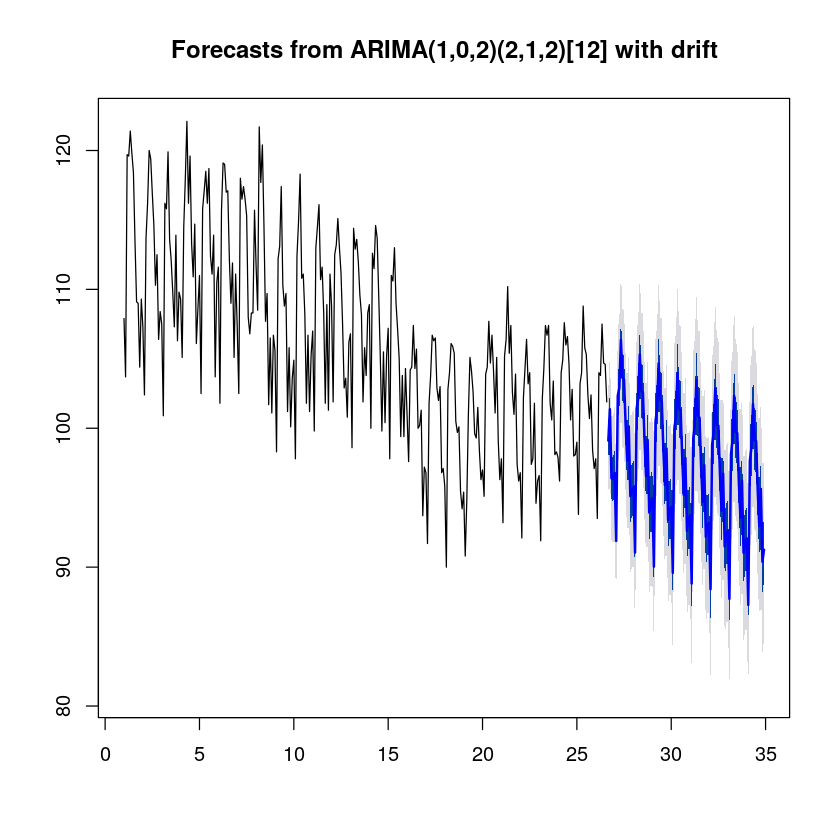


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(2,1,2)[12] with drift
Q* = 52.525, df = 16, p-value = 9.01e-06

Model df: 8.   Total lags used: 24



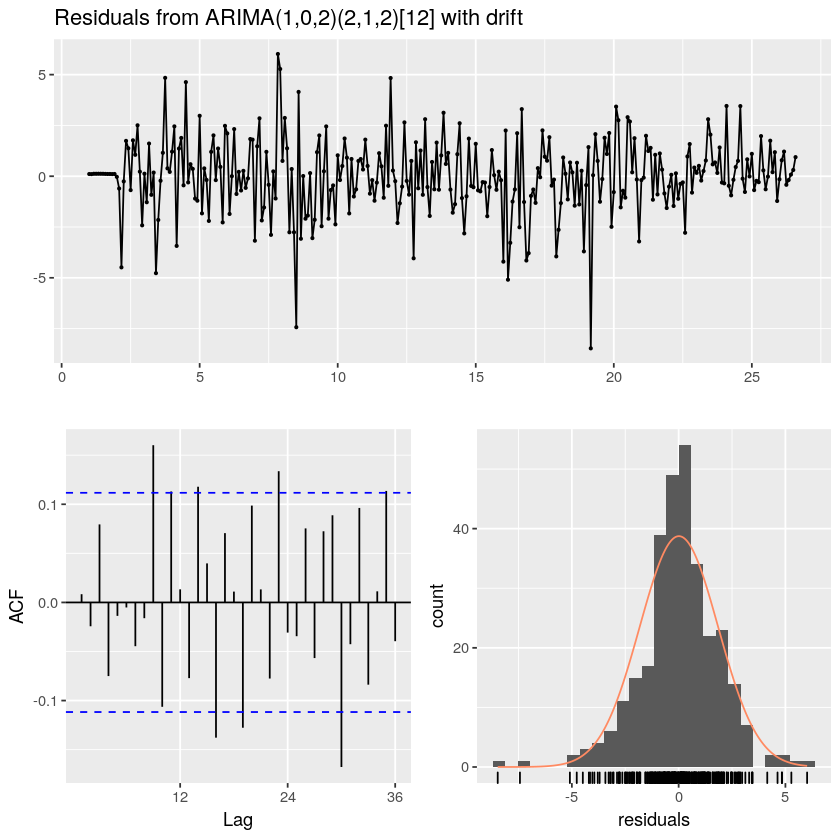

In [15]:
milk_ts = ts(as.numeric(milk), frequency = 12)
model_sarima <- auto.arima(
    milk_ts, ic = "aic",
    trace = T, stepwise = T, seasonal = T)
plot(forecast(model_sarima, level = c(50,95), h = 100))
checkresiduals(model_sarima)

予測値やその信頼区間も含めて、データの周期的な振動を再現できている。さらに、残差の自己相関も、ARモデルに比べて改善がみられる。しかし、データ全体での右下がりのトレンドまで再現してしまっている。データを見る限りでは、 平均定常→平均が変化→平均定常... という区間に別れているため、そのような予測ができるようにするための改善の余地があるかもしれない。

AICはパッケージの関数により求めることができる。

In [16]:
# AR
AIC(model_ar)

# SARIMA
AIC(model_sarima)

[1] 1699.088

[1] 1239.528

AICの観点からも、今回のデータに対しては、ARIMAモデルはARモデルよりも「よい」モデルであるといえる。

### 2. 局所定常ARモデルによる変化点検出の改善

局所定常ARモデル以上に良いモデルは思いつかなかった。実際、このモデルで変化点は十分に検出できているように見える。

更にシンプルなモデルで変化点を探すのであれば、移動平均により平滑化することで、トレンドが見やすくなり、目視で変化点を探しやすくなった。具体的な点を自動で求めたりせずに、大まかにどのあたりで変化があったか（人間の目で）見るだけであれば、移動平均で十分な場合もあるかもしれない。

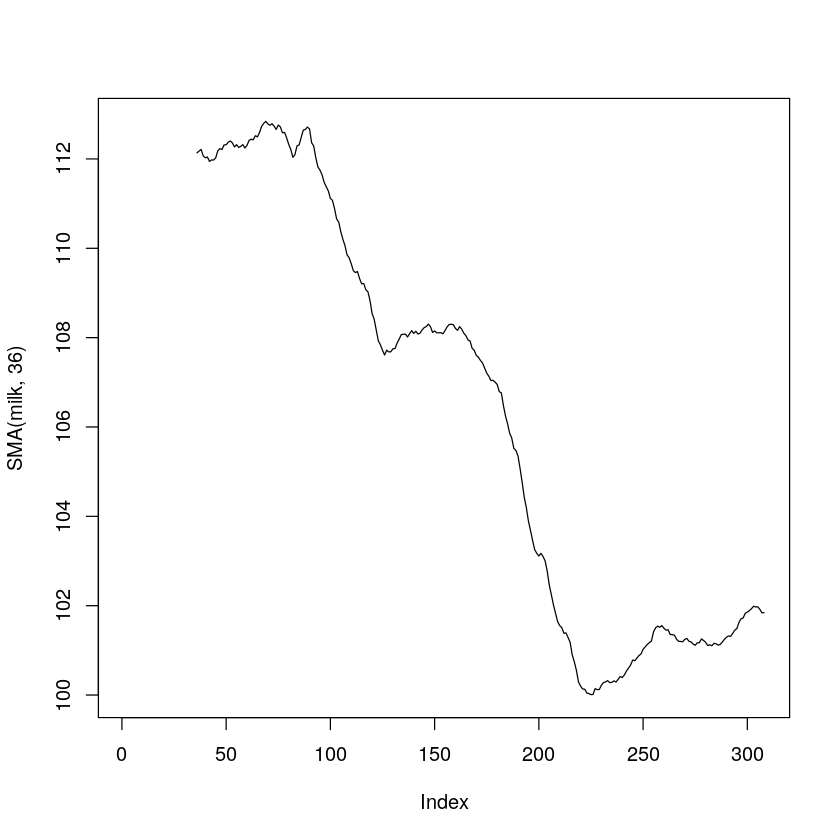

In [17]:
plot(SMA(milk, 36), type = 'l')

# 2

これまでみてきたように、予測に関してはSARIMAモデルを、変化点検出に関しては局所定常ARモデルを利用するのがよい、と考えられる。ただし、SARIMAモデルによる予測には改善の余地がみられ、平均定常→平均が変化→平均定常...というデータの変化の仕方まで再現できるモデルがあれば、より高精度な予測ができると思われる。

## 参考文献

[1] http://www.meg-snow.com/corporate/history/popup/oosaka.html 2019/07/03 閲覧。

[2] http://www.dairy.co.jp/dairydata/jdc_news/2008-11/91ra2s000000g72e-att/91ra2s000000g74m.pdf 2019/07/03 閲覧。

[3] https://www.meiji.co.jp/corporate/pressrelease/2008_meinyu/detail/20080416_01.html 2019/07/03 閲覧。

[4] http://www.meg-snow.com/news/archives/megmilk/2008/pdf/01003.pdf 2019/07/03 閲覧。

[5] https://www.morinagamilk.co.jp/release/1225_527.html 2019/07/03 閲覧。
